# Importing Necessary Modules

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import random
import warnings

warnings.filterwarnings("ignore")


C:\Users\ROSHAN\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df=pd.read_csv("Spotify_Playlist.csv")

## Features of the Dataset
1) Artist - Name of artist

2) Album -  Name of album

3) Track_name - Name of the song

4) Track_id - Unique spotify ID for each song

5) Danceability - Higher the value , easier to dance to the song

6) Energy - Higher the value , more the energy

7) Key - The key the track is in

8) loudness - higher the value louder the song

9) mode - Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

10) speechiness - higher the value , the more spoken word it contains

11) instrumentalness - Instrumental song or not.

12) liveness - higher the value the more likely it is a live recording

14) valence - higher the value , more positive the song mood

15) tempo - beats per minute

16) duration_ms - duration of song in milliseconds

In [3]:
df.head()

,artist,album,track_name,track_id,acousticness,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Radio Moscow,Brain Cycles,250 Miles,3drJvEvfMS5mnJ4JtmkM5S,0.238000,0.467,0.422,9,-11.077,0,0.0703,0.169000,0.0960,0.588,76.818,292000,4
1,Milo Greene,Milo Greene,1957,08cXy6KUizaAelYXtcew3w,0.663000,0.388,0.595,1,-9.799,1,0.0325,0.000056,0.1780,0.596,190.043,204213,4
2,The Smashing Pumpkins,Mellon Collie And The Infinite Sadness (Deluxe...,1979 - Remastered 2012,5QLHGv0DfpeXLNFo7SFEy1,0.016300,0.767,0.787,3,-9.897,1,0.0331,0.583000,0.0513,0.964,126.879,266200,4
3,Lucifer,Lucifer I,Abracadabra,4tLRIAfjJmTFtro5fPyiAx,0.000005,0.391,0.670,2,-7.096,1,0.0289,0.750000,0.0563,0.106,134.890,354266,4
4,Cigarettes After Sex,Affection,Affection,4eVNSHRazoHgfYGv3AYFyZ,0.497000,0.415,0.425,7,-11.232,1,0.0250,0.908000,0.1050,0.248,89.839,311000,4


In [4]:
ff=df   # FOR USE LATER ON

In [5]:
df.shape

(416, 17)

We have a total of 416 songs to analyze & 17 features in hand.

In [6]:
df.corr()   #Get on it later

,acousticness,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
acousticness,1.000000,0.055383,-0.764944,-0.070087,-0.608147,0.162444,-0.180900,0.018380,-0.119576,-0.214569,-0.107149,-0.155405,-0.175810
danceability,0.055383,1.000000,-0.060917,0.050515,0.002268,0.075043,-0.180295,-0.194167,-0.100130,0.521447,-0.215798,-0.312988,0.115726
energy,-0.764944,-0.060917,1.000000,0.067379,0.775205,-0.172792,0.336764,-0.017933,0.179387,0.319707,0.166023,0.074060,0.136678
key,-0.070087,0.050515,0.067379,1.000000,0.021687,-0.193948,0.056476,-0.046326,-0.013519,0.078523,-0.014316,0.054102,-0.030238
loudness,-0.608147,0.002268,0.775205,0.021687,1.000000,-0.075142,0.184585,-0.222128,0.128950,0.276287,0.120868,-0.002179,0.194109
mode,0.162444,0.075043,-0.172792,-0.193948,-0.075142,1.000000,-0.255335,-0.047774,-0.032561,-0.020089,0.018533,-0.100707,-0.023529
speechiness,-0.180900,-0.180295,0.336764,0.056476,0.184585,-0.255335,1.000000,-0.009325,0.112294,-0.071664,0.141011,0.114565,-0.170729
instrumentalness,0.018380,-0.194167,-0.017933,-0.046326,-0.222128,-0.047774,-0.009325,1.000000,-0.075121,-0.207815,-0.056086,0.364709,-0.065714
liveness,-0.119576,-0.100130,0.179387,-0.013519,0.128950,-0.032561,0.112294,-0.075121,1.000000,0.002047,0.079167,-0.050951,-0.023381
valence,-0.214569,0.521447,0.319707,0.078523,0.276287,-0.020089,-0.071664,-0.207815,0.002047,1.000000,0.050777,-0.287368,0.189122


The corr() function will be looked at later when we perform exploratory data analysis

In [7]:
df.describe()

,acousticness,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,4.160000e+02,416.000000
mean,0.225186,0.494666,0.662307,5.245192,-7.788358,0.769231,0.053401,0.141949,0.174475,0.402170,120.476317,2.648776e+05,3.865385
std,0.304814,0.150485,0.239397,3.459574,3.714610,0.421832,0.045110,0.269130,0.148496,0.241689,30.341255,9.047873e+04,0.466883
min,0.000002,0.115000,0.003420,0.000000,-30.427000,0.000000,0.023600,0.000000,0.015500,0.032100,53.297000,5.576000e+04,1.000000
25%,0.001630,0.394750,0.493750,2.000000,-9.800750,1.000000,0.030500,0.000003,0.095125,0.210750,96.406500,2.142232e+05,4.000000
50%,0.060500,0.508000,0.704000,5.000000,-6.990000,1.000000,0.037750,0.001140,0.116000,0.362000,118.279000,2.467800e+05,4.000000
75%,0.389250,0.595500,0.864250,8.000000,-5.084500,1.000000,0.055525,0.098625,0.191250,0.564000,142.191000,2.916768e+05,4.000000
max,0.989000,0.933000,0.998000,11.000000,-1.688000,1.000000,0.383000,0.979000,0.983000,0.975000,204.094000,1.120098e+06,5.000000


The describe function gives us fairly a lot of details.

The acousticness of the songs have a mean of 0.22. This is agreeably not low since std is also less (0.3) & 75% of the songs have 0.38 rating

Danceability of the songs is at a mean 0f 0.49.

The songs in the playlist are pretty energetic, with the mean being 0.66.

The loudness (dB) is calculated keeping in mind that the higher the loudness, louder the song. (NOTE - The loudness is in negatives!)

The playlist doesn't contain songs of any rap/hip-hop songs. Hence the speechiness is comparitively low.

Instrumentalness is also low, with a mean 0f 0.14. Simple , there are very less instrumental songs on this playlist/.

There are also very few live performances on this playlist, hence the liveness is also low.

Valence has a mean of 0.40. Hence most songs are more or less happy.

# Data Cleaning

No need to rename the columns 

In [8]:
df.dtypes

artist               object
album                object
track_name           object
track_id             object
acousticness        float64
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature        int64
dtype: object

The types for all the features are perfectly fine.

Let us check for any missing data.

Displays True if there is missing data, else False

In [9]:
missing_data=df.isnull()
for columns in missing_data.columns.values.tolist():
    print(columns)
    print(missing_data[columns].value_counts())
    print("")


artist
False    416
Name: artist, dtype: int64

album
False    416
Name: album, dtype: int64

track_name
False    416
Name: track_name, dtype: int64

track_id
False    416
Name: track_id, dtype: int64

acousticness
False    416
Name: acousticness, dtype: int64

danceability
False    416
Name: danceability, dtype: int64

energy
False    416
Name: energy, dtype: int64

key
False    416
Name: key, dtype: int64

loudness
False    416
Name: loudness, dtype: int64

mode
False    416
Name: mode, dtype: int64

speechiness
False    416
Name: speechiness, dtype: int64

instrumentalness
False    416
Name: instrumentalness, dtype: int64

liveness
False    416
Name: liveness, dtype: int64

valence
False    416
Name: valence, dtype: int64

tempo
False    416
Name: tempo, dtype: int64

duration_ms
False    416
Name: duration_ms, dtype: int64

time_signature
False    416
Name: time_signature, dtype: int64



Hence, no missing data. This is obvious since we directly scraped the data from the Web API

Checking for any null/missing values in our dataset.

In [10]:
df.isnull().sum()

artist              0
album               0
track_name          0
track_id            0
acousticness        0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
dtype: int64

No missing values in any column

Now let us check for any duplicate values within our dataset.

In [11]:
#CHECKING UNIQUE VALUES
non_dup=df["track_name"].duplicated().tolist()
count=0
for elements in non_dup :
    if elements==True:
        print(non_dup[elements])
        print(count)
        
    count+=1

False
180


Hold on, we are observing one duplicate value at row 180 for track_name. Let us inspect.

In [12]:
df.iloc[180,[0,2]]

artist        The Goo Goo Dolls
track_name                 Iris
Name: 180, dtype: object

In [13]:
df.iloc[179,[0,2]]

artist        Kina Grannis
track_name            Iris
Name: 179, dtype: object

Turns out to be a different song(but a cover of the original) but with the same name. So we won't remove this song 

Let us also standardize our duration_ms & convert it into minutes format for our understanding

In [14]:
#Data Standardization

df["duration_ms"]=(df["duration_ms"]/(1000*60))%60  #Convert to minutes
df.head()

,artist,album,track_name,track_id,acousticness,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Radio Moscow,Brain Cycles,250 Miles,3drJvEvfMS5mnJ4JtmkM5S,0.238000,0.467,0.422,9,-11.077,0,0.0703,0.169000,0.0960,0.588,76.818,4.866667,4
1,Milo Greene,Milo Greene,1957,08cXy6KUizaAelYXtcew3w,0.663000,0.388,0.595,1,-9.799,1,0.0325,0.000056,0.1780,0.596,190.043,3.403550,4
2,The Smashing Pumpkins,Mellon Collie And The Infinite Sadness (Deluxe...,1979 - Remastered 2012,5QLHGv0DfpeXLNFo7SFEy1,0.016300,0.767,0.787,3,-9.897,1,0.0331,0.583000,0.0513,0.964,126.879,4.436667,4
3,Lucifer,Lucifer I,Abracadabra,4tLRIAfjJmTFtro5fPyiAx,0.000005,0.391,0.670,2,-7.096,1,0.0289,0.750000,0.0563,0.106,134.890,5.904433,4
4,Cigarettes After Sex,Affection,Affection,4eVNSHRazoHgfYGv3AYFyZ,0.497000,0.415,0.425,7,-11.232,1,0.0250,0.908000,0.1050,0.248,89.839,5.183333,4


In [15]:
df = df.rename(columns={"duration_ms": "duration"})
df.columns

Index(['artist', 'album', 'track_name', 'track_id', 'acousticness',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration',
       'time_signature'],
      dtype='object')

In [16]:
df.describe()

,acousticness,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration,time_signature
count,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000
mean,0.225186,0.494666,0.662307,5.245192,-7.788358,0.769231,0.053401,0.141949,0.174475,0.402170,120.476317,4.414627,3.865385
std,0.304814,0.150485,0.239397,3.459574,3.714610,0.421832,0.045110,0.269130,0.148496,0.241689,30.341255,1.507979,0.466883
min,0.000002,0.115000,0.003420,0.000000,-30.427000,0.000000,0.023600,0.000000,0.015500,0.032100,53.297000,0.929333,1.000000
25%,0.001630,0.394750,0.493750,2.000000,-9.800750,1.000000,0.030500,0.000003,0.095125,0.210750,96.406500,3.570387,4.000000
50%,0.060500,0.508000,0.704000,5.000000,-6.990000,1.000000,0.037750,0.001140,0.116000,0.362000,118.279000,4.113000,4.000000
75%,0.389250,0.595500,0.864250,8.000000,-5.084500,1.000000,0.055525,0.098625,0.191250,0.564000,142.191000,4.861279,4.000000
max,0.989000,0.933000,0.998000,11.000000,-1.688000,1.000000,0.383000,0.979000,0.983000,0.975000,204.094000,18.668300,5.000000


# Exploratory Data Analysis

Let us observe a few of the songs in the playlist that are having certain features with highest ratings.

In [17]:
energy_max=df["energy"].max()
print(energy_max)
df.query('energy == @energy_max')

0.998


,artist,album,track_name,track_id,acousticness,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration,time_signature
40,Meshuggah,ObZen,Bleed,4E6wpXABj8XosZEPXZz2OK,0.000008,0.242,0.998,3,-5.640,0,0.0895,0.880,0.284,0.1800,114.831,7.378883,4
322,Decapitated,Nihility,Spheres of Madness,4lNznSUjByH5zWpPZFFeff,0.000026,0.472,0.998,6,-4.674,0,0.2240,0.586,0.225,0.0863,154.901,5.252217,4


In [18]:
acoustic_max=df["acousticness"].max()
print(acoustic_max)
df.query('acousticness == @acoustic_max')

0.9890000000000001


,artist,album,track_name,track_id,acousticness,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration,time_signature
367,Gustavo Santaolalla,The Last of Us,Vanishing Grace (Innocence),0VghZFhcQKEcLvsxV4N7cG,0.989,0.577,0.163,7,-26.792,1,0.0397,0.891,0.11,0.335,146.775,0.929333,3


In [19]:
dance_max=df["danceability"].max()
print(dance_max)
df.query('danceability == @dance_max')

0.9329999999999999


,artist,album,track_name,track_id,acousticness,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration,time_signature
16,Queen,The Game (Deluxe Remastered Version),Another One Bites The Dust - Remastered 2011,57JVGBtBLCfHw2muk5416J,0.112,0.933,0.528,5,-6.472,0,0.162,0.329,0.163,0.756,109.975,3.57755,4


In [20]:
instru_max=df["instrumentalness"].max()
print(instru_max)
df.query('instrumentalness == @instru_max')

0.9790000000000001


,artist,album,track_name,track_id,acousticness,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration,time_signature
348,Hammock,Departure Songs,Ten Thousand Years Won't Save Your Life,4tvMXXnjUZYhT0lD1LTWPU,0.125,0.157,0.43,7,-8.93,1,0.0348,0.979,0.0686,0.0396,78.489,6.461117,4


In [21]:
valence_max=df["valence"].max()
print(valence_max)
df.query('valence == @valence_max')

0.975


,artist,album,track_name,track_id,acousticness,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration,time_signature
245,Matt Nathanson,Modern Love,Modern Love,7tRQdzGdJ5KDhow1kYe69B,0.0463,0.74,0.886,8,-3.456,1,0.0251,0.0,0.177,0.975,110.017,3.526217,4


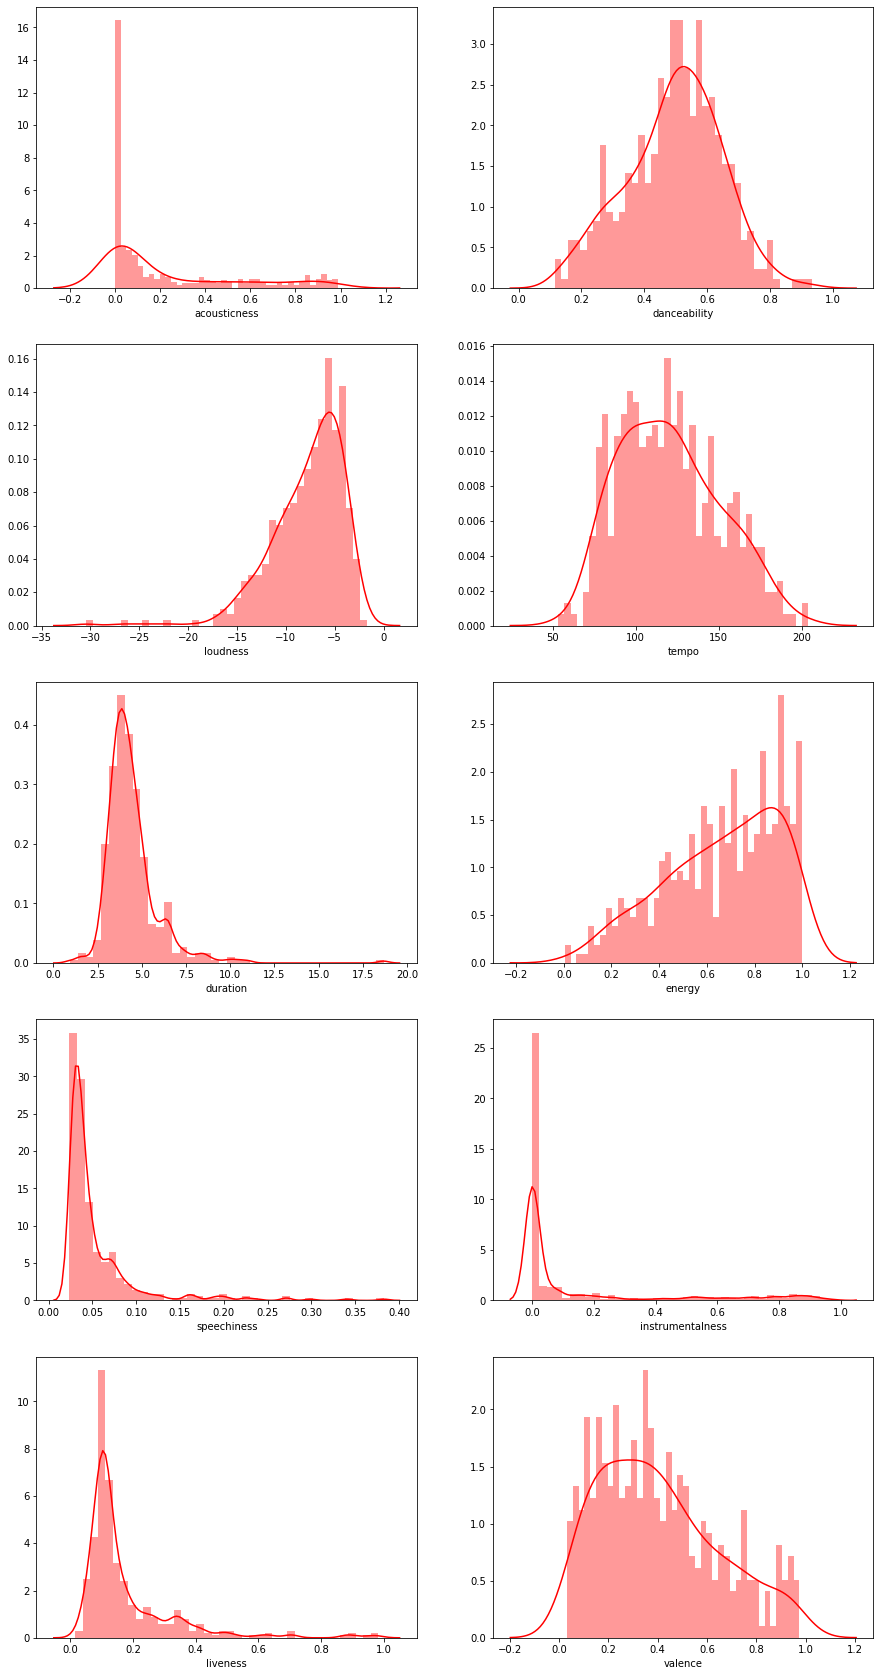

In [22]:
fig, axes = plt.subplots(nrows=5, ncols=2,figsize=(15,30))
display=["acousticness","danceability", "loudness" ,"tempo","duration",
                 "energy" ,"speechiness" ,"instrumentalness" ,
                 "liveness" ,"valence"]

yes=[0,0,0,1,1,0,1,1,2,0,2,1,3,0,3,1,4,0,4,1]
count=0
for column in display:
    sns.distplot(df[column],ax=axes[yes[count],yes[count+1]],
                 bins=40,kde=True,color='r',norm_hist=False)
    count+=2

These visualizations are pretty self-explanatory. Also described when we used the describe() function

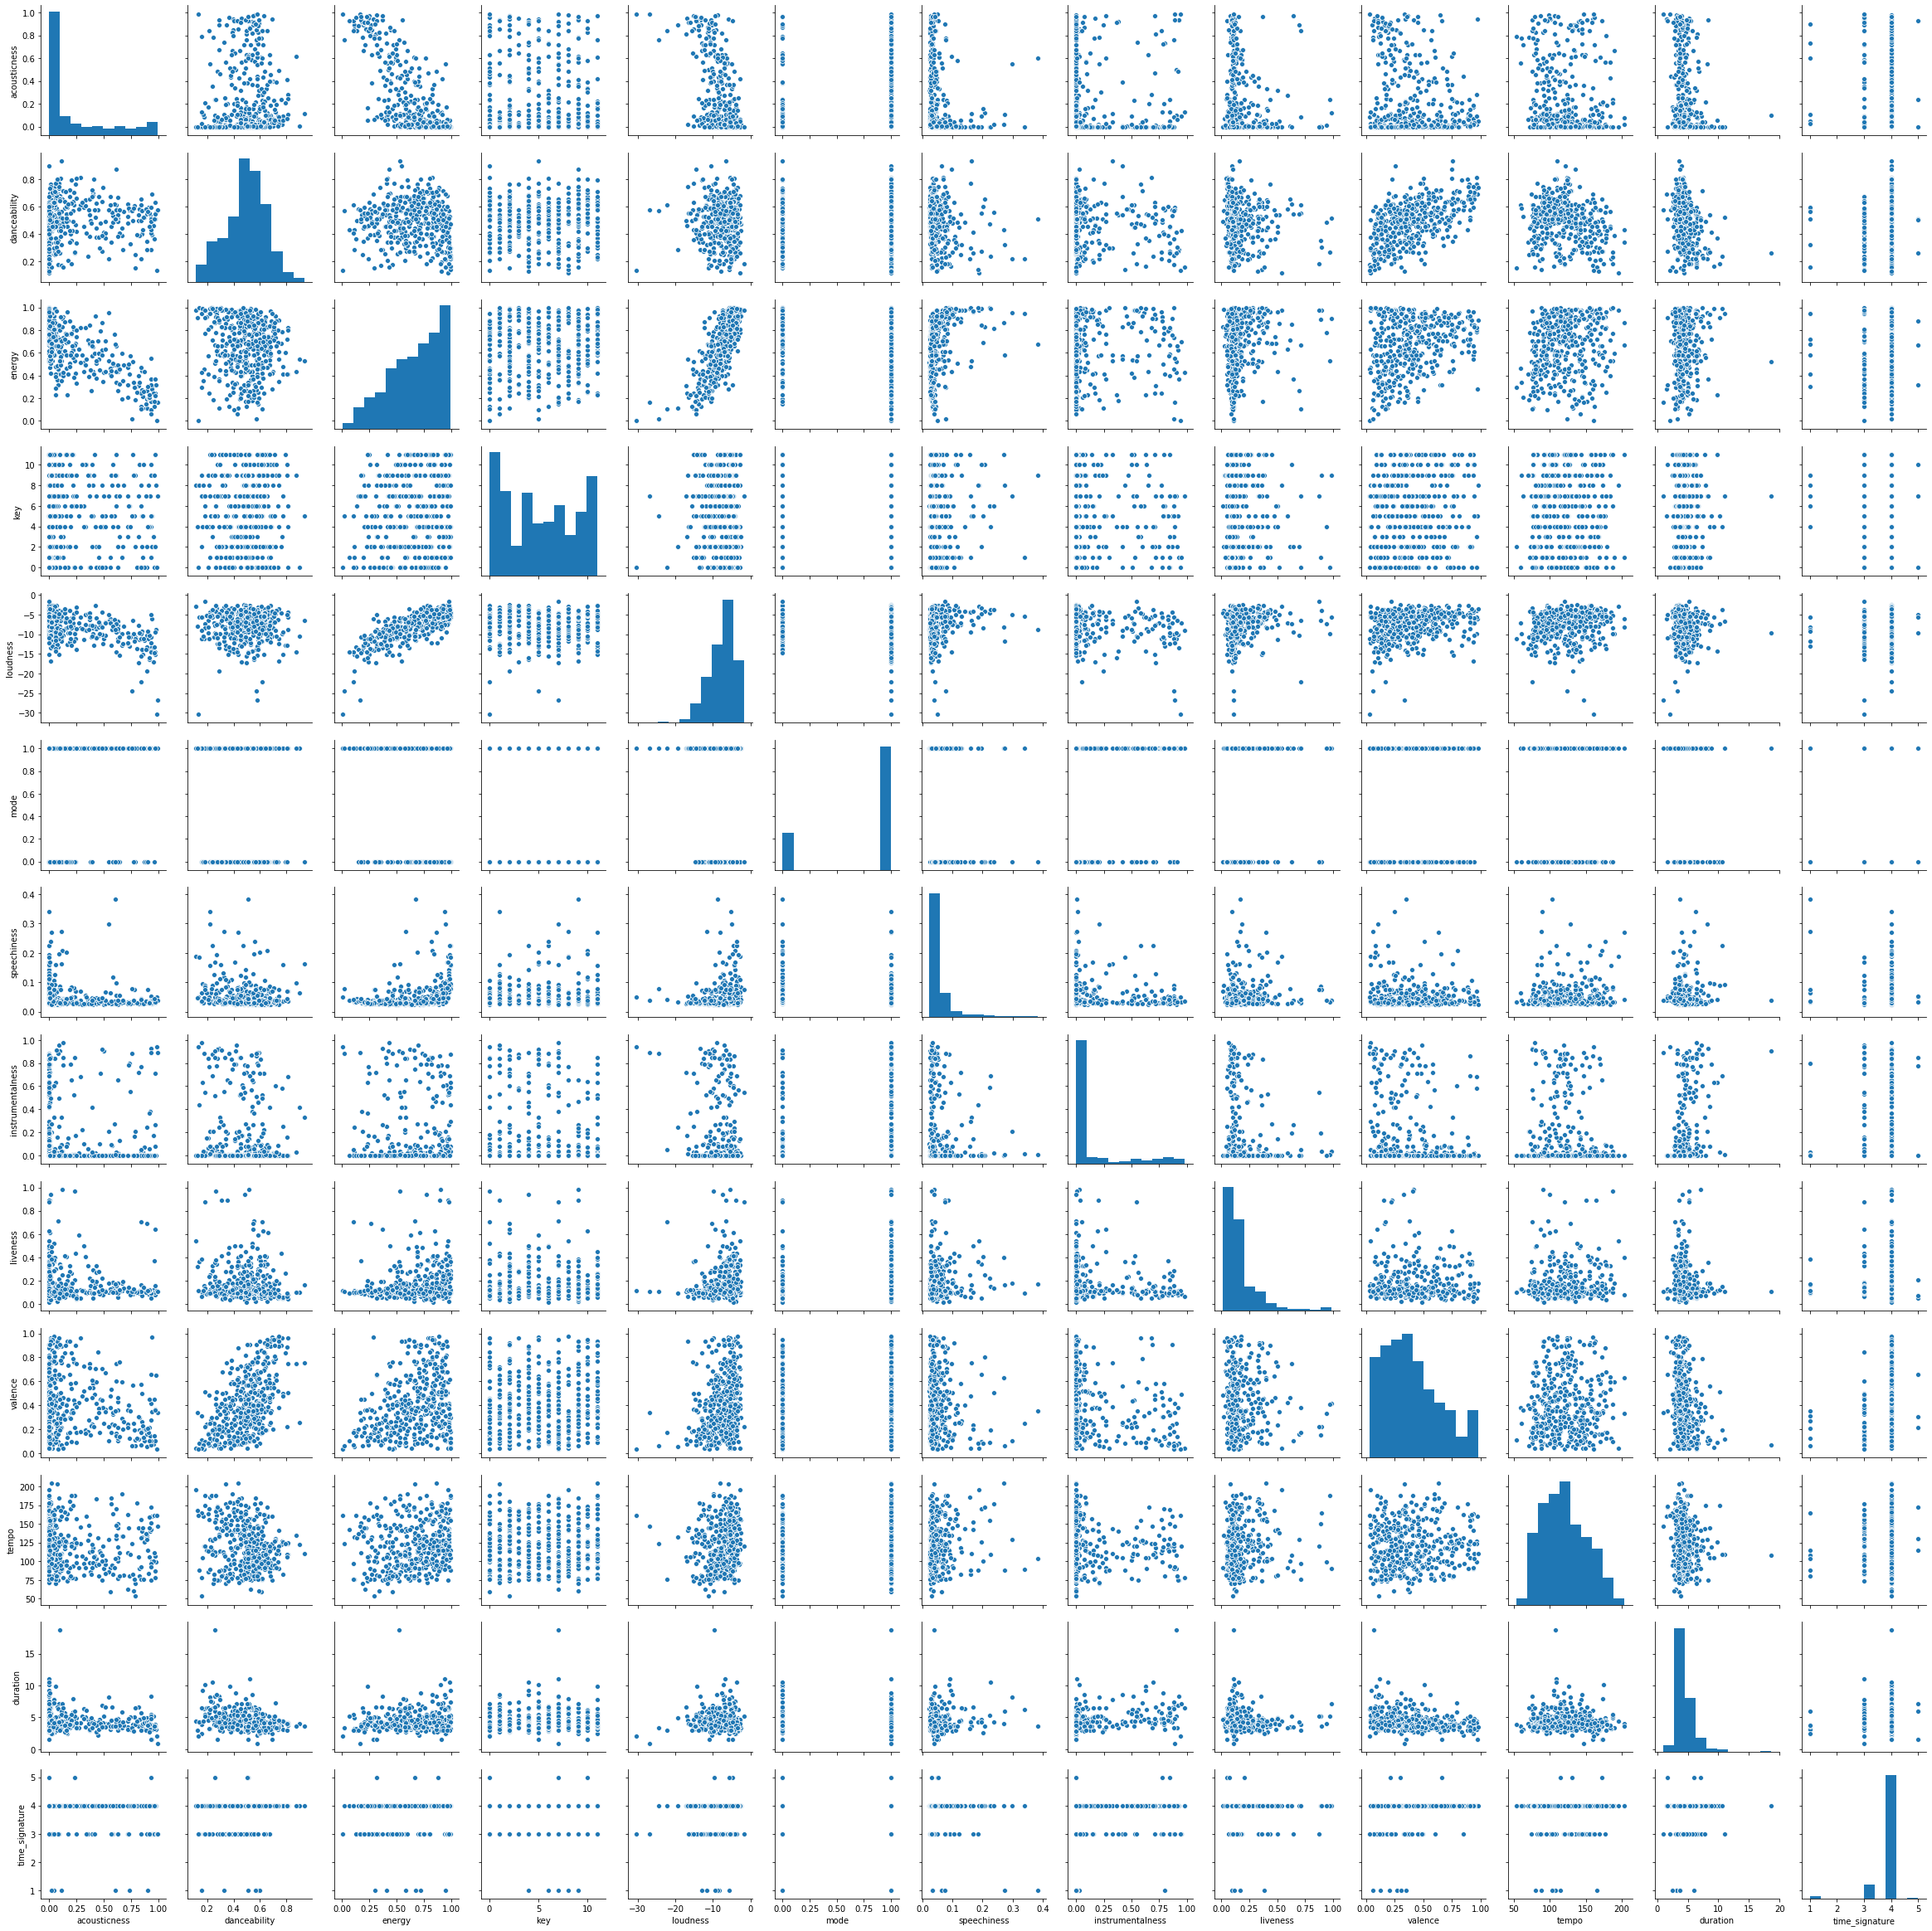

In [23]:
sns.pairplot(df)

In [36]:
corr=df.corr()


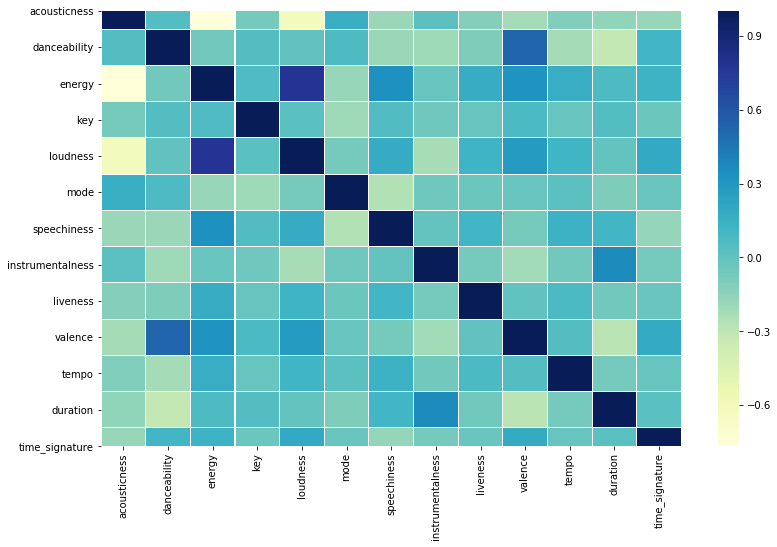

In [37]:
fig, ax = plt.subplots(figsize=(13,8))
sns.heatmap(corr, cmap="YlGnBu",linewidth=0.02, ax=ax)

The pairplot here gives a visual representation of the correlations among the features in the dataset. Some notable correlations that are significantly observed to be higher are - 

#Energy-acousticness
#loudness-acousticness
#valence- danceability
#energy - loudness
#instrumentalness- duration_
#valence-energy


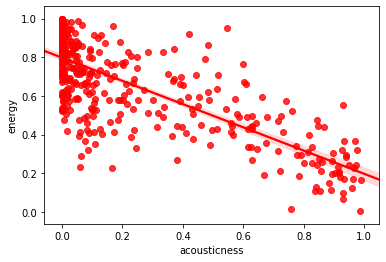

In [41]:
reg1 = sns.regplot(df["acousticness"],df["energy"],color='r')

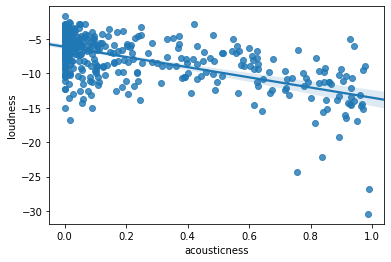

In [39]:
sns.regplot(df["acousticness"],df["loudness"])

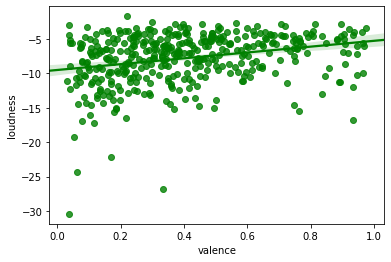

In [42]:
reg2 = sns.regplot(df["valence"],df["loudness"],color='g')

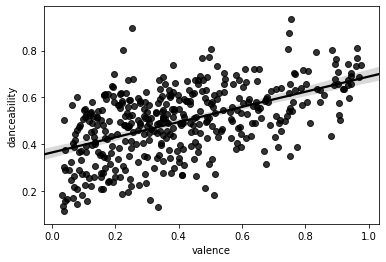

In [43]:
reg3 = sns.regplot(df["valence"],df["danceability"],color='black')

Here , we are showing the different levels of acousticness, on average when compared to the mode. The mode being ; 1 is major & 0 is minor, in terms of the melodic content

In [45]:
df.groupby('mode')["acousticness"].mean()

mode
0    0.134893
1    0.252274
Name: acousticness, dtype: float64

In [46]:
df.loc[:,['mode','acousticness']]

,mode,acousticness
0,0,0.238000
1,1,0.663000
2,1,0.016300
3,1,0.000005
4,1,0.497000
...,...,...
411,0,0.774000
412,0,0.390000
413,0,0.963000
414,0,0.603000


In [47]:
df["artist"].value_counts().head()

Various Artists    16
Jimmy Eat World     8
The 1975            7
Alice In Chains     7
Matt Nathanson      5
Name: artist, dtype: int64

Here, the song artist with the most songs in the playlist is Jimmy Eat World.

In [34]:
df["album"].value_counts().head()

Gothic Rock 3 - Black on Black               6
Dumb and Numb                                5
Greatest Hits                                3
A Brief Inquiry Into Online Relationships    3
Fantastic Planet                             3
Name: album, dtype: int64

Here, the most songs that belong to an album that are featured in this playlist are from the album - Gothic Rock3 - Black on Black

###### song_dur_mean75=df["duration"].quantile(0.75)
print(song_dur_mean75)
dur_75=df.query('duration > @song_dur_mean75')
dur_not_75=df.query('duration < @song_dur_mean75')
dur_not_75

Here, all I have done is create another dataframe having song length less than the 75th quantile,i.e, less than 4.86 minutes.

In [50]:
df["instrumentalness"].std()

0.269129569505809

In [51]:
(dur_not_75["instrumentalness"].mean(),dur_75["instrumentalness"].mean())

(0.09575724423076923, 0.28052240576923076)

We observe that the instrumentalness of songs that are less than the duration of the 75th percentile, have a very low rating, on average.

Whereas the songs above the 75th percentile are having mean instrumentalness of around 28.05. Hence means that instrumental songs tend to be longer in this playlist.

# Machine Learning

## Standardizing The Data

It is important for us to standardize/rescale the data so we can perform the necessary techniques that will be required for clustering.

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


cluster_features=["danceability" ,"acousticness",
                 "energy" , "tempo",
                  "valence"]


df_cluster = df[cluster_features]
X = np.array(df_cluster)
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
X.shape

(416, 5)

For prediction & standardization, only 5 features out of the given ones are chosen. These are-

1) Danceability
2) Acousticness
3) Energy
4) Tempo
5) Valence

These are standardized using the StandardScaler from sklearn

In [55]:
new_ss=pd.DataFrame(X)
new_ss

,0,1,2,3,4
0,-0.184066,0.042088,-1.005009,-1.440642,0.769807
1,-0.709667,1.438060,-0.281490,2.295569,0.802947
2,1.811887,-0.686117,0.521491,0.211276,2.327400
3,-0.689707,-0.739640,0.032175,0.475624,-1.226896
4,-0.530031,0.892810,-0.992462,-1.010974,-0.638656
...,...,...,...,...,...
411,0.620968,1.802655,-1.339584,-1.996792,-0.651083
412,1.519147,0.541353,0.007081,-0.971871,0.852657
413,0.115327,2.423452,-2.050557,-0.304154,0.193994
414,0.115327,1.240982,0.048903,-0.571043,-0.211974


## Using Kmeans Elbow Method 

Before moving on to performing Kmeans, it is viable to select the value of K to work with. In unsupervised learning the K value cannot be found out, hence we can decide on or own or use certain techniques like the Elbow Method & Sillhouette Method.

Here, we have chosen to use the Elbow method for visualization using sklearn library.

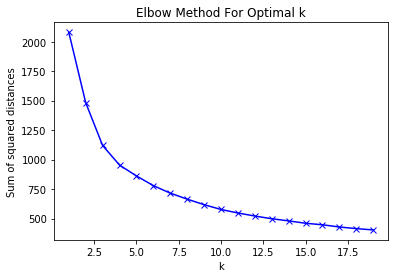

In [56]:
from sklearn.cluster import KMeans

ss_dist = []
K = range(1, 20)
for k in K:
    km = KMeans(n_clusters=k, init='k-means++')
    km = km.fit(X)
    ss_dist.append(km.inertia_)
plt.plot(K, ss_dist, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()



The graph shows a decline on the mark of around & between 3 & 4. From personally knowing my own playlist. It is suggested to decide on a value of K as 4 to proceed with when we do clustering.

In [57]:
#K-->4

## Factor Analysis

Factor analysis is a technique that is used to reduce a large number of variables into fewer numbers of factors.  This technique extracts maximum common variance from all variables and puts them into a common score. 

https://www.statisticssolutions.com/factor-analysis-sem-factor-analysis/#:~:text=Factor%20analysis%20is%20a%20technique,them%20into%20a%20common%20score.

In [58]:
from factor_analyzer import FactorAnalyzer

In [60]:
df_factor=df.drop(['artist', 'album', 'track_id' , 'track_name' ,
                   'time_signature' ,"loudness","liveness",
                   "tempo",'mode', 'key',"duration"],axis=1)
df_factor

,acousticness,danceability,energy,speechiness,instrumentalness,valence
0,0.238000,0.467,0.422,0.0703,0.169000,0.588
1,0.663000,0.388,0.595,0.0325,0.000056,0.596
2,0.016300,0.767,0.787,0.0331,0.583000,0.964
3,0.000005,0.391,0.670,0.0289,0.750000,0.106
4,0.497000,0.415,0.425,0.0250,0.908000,0.248
...,...,...,...,...,...,...
411,0.774000,0.588,0.342,0.0373,0.000004,0.245
412,0.390000,0.723,0.664,0.0380,0.025400,0.608
413,0.963000,0.512,0.172,0.0431,0.000051,0.449
414,0.603000,0.512,0.674,0.3830,0.004120,0.351


Kaiser-Meyer-Olkin (KMO) Test measures the suitability of data for factor analysis. It determines the adequacy for each observed variable and for the complete model. KMO estimates the proportion of variance among all the observed variable. Lower proportion id more suitable for factor analysis. KMO values range between 0 and 1. Value of KMO less than 0.6 is considered inadequate.

In [61]:

from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df_factor)
kmo_model

0.5202656146389897

Factor score not high enough to do factor analysis. 

We will go ahead and perform PCA on our dataset & won't do use the modelling technique of factor analysis.

## Performing PCA

We use PCA from sklearn library & perform on the standardized dataframe that we made earlier.

In [62]:
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(X)
x_pca = pd.DataFrame(x_pca)
x_pca.head()

,0,1,2,3,4
0,0.623858,-0.964230,-0.875538,-0.907252,-0.897292
1,0.402406,0.585797,2.675554,-0.867755,0.385441
2,-1.952917,-2.231496,0.773119,-0.085042,-0.297779
3,0.027611,1.463413,-0.238200,0.692836,-0.276025
4,1.682097,0.008853,-0.705536,-0.397608,-0.087009


In [63]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.39394323, 0.30146448, 0.18511387, 0.07624339, 0.04323502])

The first 3 columns explain about 88% of the variance. Hence we drop the last 2 columns

### Using YellowBrick Visualizer for Elbow Method after performing PCA

Additionally, we are using the Yellowbrick library for visualization of the Elbow Method after performing PCA.

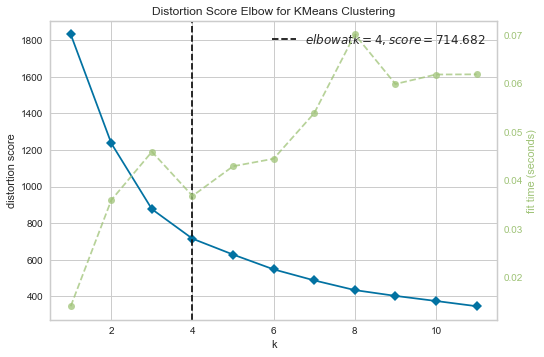

In [68]:
from yellowbrick.cluster import KElbowVisualizer
visualizer = KElbowVisualizer(km, k=(1,12))
visualizer.fit(x_pca)
visualizer.show()

In [69]:
x_pca.shape

(416, 3)

# Implementing Kmeans With PCA

Now, we perform the Kmeans using sklearn method, keeping clusters = 4

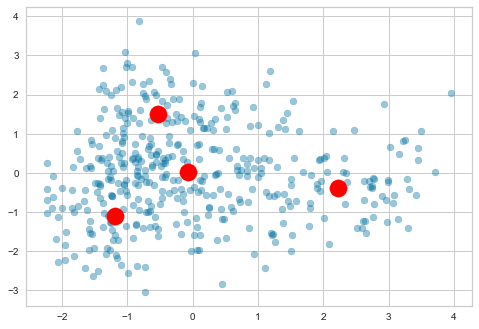

In [70]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10)
y_kmeans=kmeans.fit_predict(x_pca)
list(y_kmeans)
plt.scatter(x_pca.iloc[:,0], x_pca.iloc[:,1],alpha=0.4)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

The visualization is done on the basis of the first 2 columns of the dataframe we performed PCA on. This is a 2D graph for visualizing the different clusters that are being separated.

The red blobs indicate the cluster centers for each cluster. Let us look at a more cleaner visualization.

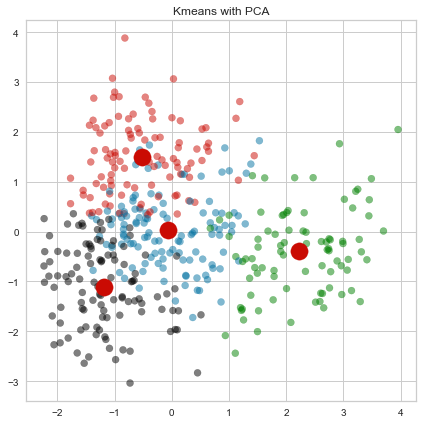

In [71]:
LABEL_COLOR_MAP = {0:'black', 1: 'green', 2: 'b', 3: 'r' }
label_color = [LABEL_COLOR_MAP[l] for l in y_kmeans]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(x_pca.iloc[:,0],x_pca.iloc[:,1], c= label_color, alpha=0.5) 
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='r')
plt.title("Kmeans with PCA")
plt.savefig('Kmeans with PCA.png', dpi=75, bbox_inches='tight')
plt.show()

Here, we have assigned different colors for each of the individual points for each cluster for better seperation.

On observation, overlappiing is observed. We will look at a 3D plot as well.

In [72]:
x_pca['label_Kmeans_PCA'] = kmeans.labels_
x_pca

,0,1,2,label_Kmeans_PCA
0,0.623858,-0.964230,-0.875538,2
1,0.402406,0.585797,2.675554,3
2,-1.952917,-2.231496,0.773119,0
3,0.027611,1.463413,-0.238200,3
4,1.682097,0.008853,-0.705536,1
...,...,...,...,...
411,2.513547,-1.416474,-1.142839,1
412,-0.022247,-2.004725,-0.297910,0
413,2.757954,-1.130002,0.865940,1
414,0.902386,-0.414322,-0.202478,2


Here, I have assigned the labels for this clustering method to the dataframe accordingly.

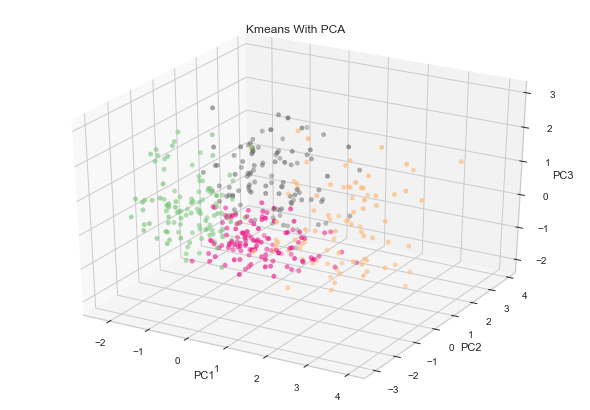

In [73]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(x_pca[0], x_pca[1], x_pca[2],
           c=x_pca['label_Kmeans_PCA'], cmap='Accent')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('Kmeans With PCA')
plt.show()


Here is a visual 3D graph of the 3 columns we used when performing Kmeans of our dataframe.

In [74]:

l=kmeans.labels_


# Implementing Heirarchical Clustering with PCA

Here, we used another method known as Hierarchical Clustering instead of Kmeans when we performed PCA. Let us look at the clusters this makes.

In [76]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
y_heir_clust=cluster.fit_predict(x_pca)
type(list(y_heir_clust))


list

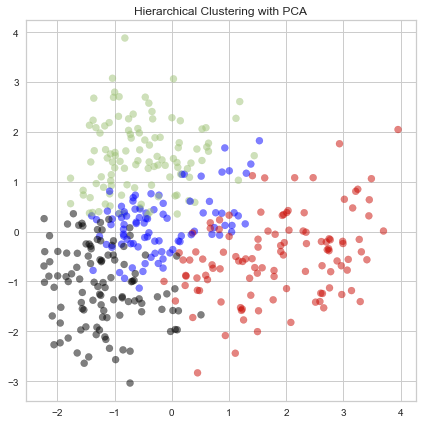

In [77]:
LABEL_COLOR_MAP2 = {0:'r', 1: 'g', 2: 'black', 3: 'blue' }
label_color1 = [LABEL_COLOR_MAP2[l] for l in y_heir_clust]

plt.figure(figsize=(7, 7))  
plt.scatter(x_pca.iloc[:,0],x_pca.iloc[:,1], c= label_color1, alpha=0.5) 
plt.title("Hierarchical Clustering with PCA")
plt.savefig('HeirarchicalCLustering with PCA.png', dpi=75, bbox_inches='tight')
plt.show()

There are reduced overlapping as observed when we did Kmeans

In [78]:
x_pca['label_Hierarchical_PCA'] = y_heir_clust
x_pca

,0,1,2,label_Kmeans_PCA,label_Hierarchical_PCA
0,0.623858,-0.964230,-0.875538,2,0
1,0.402406,0.585797,2.675554,3,1
2,-1.952917,-2.231496,0.773119,0,2
3,0.027611,1.463413,-0.238200,3,1
4,1.682097,0.008853,-0.705536,1,0
...,...,...,...,...,...
411,2.513547,-1.416474,-1.142839,1,0
412,-0.022247,-2.004725,-0.297910,0,2
413,2.757954,-1.130002,0.865940,1,0
414,0.902386,-0.414322,-0.202478,2,0


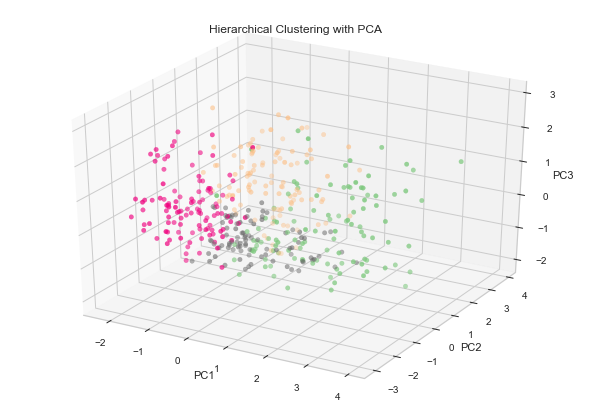

In [79]:

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(x_pca[0], x_pca[1], x_pca[2],
           c=x_pca['label_Hierarchical_PCA'], cmap='Accent')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('Hierarchical Clustering with PCA')
plt.show()

# Implementing Kmeans With TSVD

Now , instead of PCA, I have used TSVD. This is another dimensionality reduction technique that can be used.

This is very similar to PCA, excepting that the factorization for SVD is done on the data matrix, whereas for PCA, the factorization is done on the covariance matrix. Typically, SVD is used under the hood to find the principle components of a matrix.

In [84]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(2)
svd.fit(X)
X_tsvd = svd.transform(X)


In [85]:
tsvd_kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10)
tsvd_y_kmeans=kmeans.fit_predict(X_tsvd)


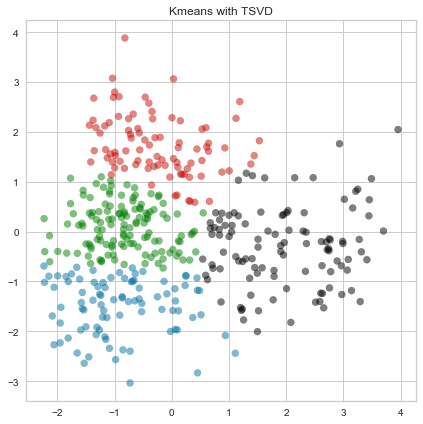

In [86]:
LABEL_COLOR_MAP1 = {0:'black', 1: 'green', 2: 'b', 3: 'r' }
label_color4 = [LABEL_COLOR_MAP1[l] for l in tsvd_y_kmeans]

plt.figure(figsize=(7, 7))  
plt.scatter(X_tsvd[:,0],X_tsvd[:,1], c= label_color4, alpha=0.5) 

plt.title("Kmeans with TSVD")
plt.savefig('Kmeans with TSVD.png', dpi=75, bbox_inches='tight')
plt.show()

The overlapping has been considerably removed.

# Implementing Heirarachical Clustering with TSVD

In [87]:
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
y_heir_clust_tsvd=cluster.fit_predict(X_tsvd)

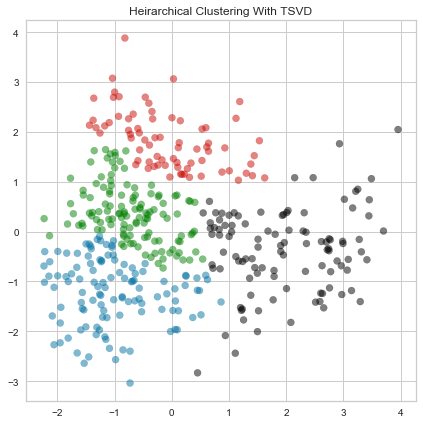

In [88]:
LABEL_COLOR_MAP5 = {0:'black', 1: 'green', 2: 'b', 3: 'r' }
label_color5 = [LABEL_COLOR_MAP1[l] for l in y_heir_clust_tsvd]

plt.figure(figsize=(7, 7))  
plt.scatter(X_tsvd[:,0],X_tsvd[:,1], c= label_color5, alpha=0.5) 
plt.title('Heirarchical Clustering With TSVD')
plt.savefig('Heirarachical Clustering with TSVD.png', dpi=75, bbox_inches='tight')
plt.show()

In [89]:
cluster_ykmeans=tsvd_y_kmeans

Now, for proceeding, we are using the **Kmeans with TSVD** model for clustering. Hence we will be adding the labels of that model to our original dataset.

In [90]:
ff.insert(4, "Cluster",cluster_ykmeans, True)
ff

,artist,album,track_name,track_id,Cluster,acousticness,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Radio Moscow,Brain Cycles,250 Miles,3drJvEvfMS5mnJ4JtmkM5S,0,0.238000,0.467,0.422,9,-11.077,0,0.0703,0.169000,0.0960,0.588,76.818,4.866667,4
1,Milo Greene,Milo Greene,1957,08cXy6KUizaAelYXtcew3w,3,0.663000,0.388,0.595,1,-9.799,1,0.0325,0.000056,0.1780,0.596,190.043,3.403550,4
2,The Smashing Pumpkins,Mellon Collie And The Infinite Sadness (Deluxe...,1979 - Remastered 2012,5QLHGv0DfpeXLNFo7SFEy1,2,0.016300,0.767,0.787,3,-9.897,1,0.0331,0.583000,0.0513,0.964,126.879,4.436667,4
3,Lucifer,Lucifer I,Abracadabra,4tLRIAfjJmTFtro5fPyiAx,3,0.000005,0.391,0.670,2,-7.096,1,0.0289,0.750000,0.0563,0.106,134.890,5.904433,4
4,Cigarettes After Sex,Affection,Affection,4eVNSHRazoHgfYGv3AYFyZ,0,0.497000,0.415,0.425,7,-11.232,1,0.0250,0.908000,0.1050,0.248,89.839,5.183333,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,Resa,Dumb and Numb,Sunday,5Jc8cXQ7qfmgxim5AlG83Y,0,0.774000,0.588,0.342,9,-9.914,0,0.0373,0.000004,0.1310,0.245,59.964,2.783333,4
412,Resa,Dumb and Numb,You Need a Puppy,6KMd9P83K62aGF4Lr4zczx,2,0.390000,0.723,0.664,10,-10.502,0,0.0380,0.025400,0.1990,0.608,91.024,3.386800,4
413,Resa,Dumb and Numb,Love ain't Free,27pbCujAPAE8yZmzHTcmMQ,0,0.963000,0.512,0.172,9,-14.790,0,0.0431,0.000051,0.3680,0.449,111.259,3.638150,4
414,Resa,Dumb and Numb,Borrowed Time,4EOtOCq6VRe7uhnxec9FWc,0,0.603000,0.512,0.674,9,-8.864,0,0.3830,0.004120,0.1690,0.351,103.171,3.670283,1


This is how our dataset looks like after clustering

In [96]:
cluster_1=ff.query('Cluster == 0')
cluster_1.head(10)

,artist,album,track_name,track_id,Cluster,acousticness,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Radio Moscow,Brain Cycles,250 Miles,3drJvEvfMS5mnJ4JtmkM5S,0,0.2380,0.467,0.422,9,-11.077,0,0.0703,0.169000,0.0960,0.5880,76.818,4.866667,4
4,Cigarettes After Sex,Affection,Affection,4eVNSHRazoHgfYGv3AYFyZ,0,0.4970,0.415,0.425,7,-11.232,1,0.0250,0.908000,0.1050,0.2480,89.839,5.183333,4
5,INXS,Switch,Afterglow,28ifPHns96vaSFxC47C57t,0,0.0842,0.508,0.495,6,-8.988,1,0.0254,0.001250,0.1240,0.0985,104.995,4.135783,4
13,Matt Nathanson,Some Mad Hope,All We Are,4SXcG6Ti32myNw9GJ9qeDt,0,0.5840,0.534,0.492,4,-8.905,1,0.0261,0.000001,0.1850,0.3280,82.465,3.615550,3
15,Say Hi,Diamonds & Donuts,And Then Some Miniature Golfing,7oeXVpTayTnO55cqRAKwxP,0,0.6110,0.611,0.490,7,-8.013,1,0.0263,0.000486,0.1000,0.1630,130.018,3.509783,4
19,Joy Division,Substance,Atmosphere - 2010 Remaster,5UPnBgnylUCjtAPtAH4tJY,0,0.2270,0.615,0.386,6,-11.813,1,0.0315,0.523000,0.1160,0.4420,120.032,4.157983,4
24,Father John Misty,Pure Comedy,Ballad of the Dying Man,4ybyq1pLxA7PnbbCp6sNu7,0,0.8480,0.399,0.443,5,-9.168,1,0.0272,0.000406,0.0899,0.2650,139.643,4.845600,4
25,Rosie Carney,Bare,Bare,4NyDbkF2p3U0jeT8kiTFac,0,0.9710,0.630,0.245,11,-15.171,1,0.0290,0.709000,0.0819,0.3680,106.996,3.909100,3
26,Foy Vance,Melrose EP,Be the Song,5A1u2GMvgMOMECWuYRBNc1,0,0.8130,0.498,0.308,7,-17.203,1,0.0276,0.718000,0.1050,0.1170,106.155,6.558217,4
28,Trading Yesterday,The Beauty & the Tragedy,Beautiful,6KCFLMKvMihxaP4V0tis8u,0,0.5120,0.491,0.431,5,-10.318,1,0.0274,0.000152,0.1060,0.3650,96.096,4.026000,4


In [97]:
cluster_2=ff.query('Cluster == 1')
cluster_2.head(10)

,artist,album,track_name,track_id,Cluster,acousticness,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
12,Foo Fighters,One By One (Expanded Edition),All My Life,6tsojOQ5wHaIjKqIryLZK6,1,0.000218,0.580,0.604,5,-5.703,1,0.0470,0.000579,0.4770,0.645,167.784,4.390667,4
14,Against The Current,Past Lives,Almost Forgot,0htezQjIT0FNJQoZb6EJql,1,0.333000,0.647,0.825,4,-5.020,1,0.0555,0.000013,0.4050,0.190,104.037,3.469550,4
20,Foo Fighters,There Is Nothing Left To Lose,Aurora,7dIh8FF0EzYKS8STv3v4F4,1,0.004810,0.586,0.858,9,-5.254,1,0.0313,0.469000,0.2380,0.278,122.996,5.828000,4
31,The Calling,Two,Believing,5mMPLxAoeSlZ7CuOG1oaSs,1,0.079400,0.491,0.624,8,-6.500,1,0.0292,0.000000,0.1150,0.305,88.071,3.855333,4
36,Massive Wagons,Billy Balloon Head,Billy Balloon Head,6N9I99DVC1fLWYao7ZEieI,1,0.000154,0.475,0.943,8,-4.592,1,0.0639,0.000344,0.3240,0.593,127.026,4.617117,4
39,Failure,Fantastic Planet,Blank,42XjTDFOxf8sZq4PJEHTxu,1,0.139000,0.591,0.614,6,-8.740,1,0.0300,0.000018,0.0611,0.340,116.398,5.646000,4
41,Orange Goblin,Time Travelling Blues,Blue Snow,0c2Bm6c4vyIUesTzfFZA1b,1,0.000060,0.448,0.808,11,-7.577,0,0.0399,0.846000,0.2670,0.332,118.961,4.385783,4
42,Puddle Of Mudd,Come Clean,Blurry,6lSr3iZTC144PKhvbPFzMp,1,0.008050,0.431,0.938,3,-4.507,0,0.0542,0.000000,0.1380,0.523,157.462,5.066667,4
43,Dream Theater,A Dramatic Turn of Events,Bridges in the Sky,2eBHUYKjKhcFwSNmPkZday,1,0.001120,0.524,0.944,7,-6.697,1,0.0911,0.006680,0.1090,0.120,108.785,11.023783,3
46,Wolf Alice,My Love Is Cool,Bros,6NunWZuZ6g9KipJ9Q5Vck7,1,0.003820,0.583,0.921,4,-8.380,1,0.0697,0.459000,0.2260,0.222,125.980,3.745333,4


In [98]:
cluster_3=ff.query('Cluster == 2')
cluster_3.head(10)

,artist,album,track_name,track_id,Cluster,acousticness,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
2,The Smashing Pumpkins,Mellon Collie And The Infinite Sadness (Deluxe...,1979 - Remastered 2012,5QLHGv0DfpeXLNFo7SFEy1,2,0.01630,0.767,0.787,3,-9.897,1,0.0331,0.583000,0.0513,0.964,126.879,4.436667,4
6,Lenny Kravitz,Greatest Hits,Again,16gvJsVyauI16RqmOrwJJk,2,0.01860,0.554,0.820,2,-5.035,1,0.0296,0.000049,0.1610,0.752,79.147,3.815550,4
8,Cage The Elephant,Cage The Elephant,Ain't No Rest for the Wicked,3kb72STxc2959ZqsTwu52i,2,0.04380,0.634,0.849,0,-7.075,1,0.1050,0.000000,0.3630,0.919,156.004,2.924883,4
9,Vishal-Shekhar,Om Shanti Om,Ajab Si,5FXMRdJjKq1BIX4e8Eg9mK,2,0.39700,0.697,0.438,8,-8.411,1,0.0289,0.000000,0.2930,0.580,117.954,4.027800,4
16,Queen,The Game (Deluxe Remastered Version),Another One Bites The Dust - Remastered 2011,57JVGBtBLCfHw2muk5416J,2,0.11200,0.933,0.528,5,-6.472,0,0.1620,0.329000,0.1630,0.756,109.975,3.577550,4
18,She Past Away,Narin Yalnızlık,Asimilasyon,3A6pYIUJ7jspDJdab9pCPo,2,0.00066,0.575,0.899,2,-4.328,1,0.0473,0.865000,0.0805,0.905,159.993,4.201567,4
22,Tracy Chapman,Tracy Chapman,Baby Can I Hold You,2DjWsDGgL1xNbhnr7f6t5F,2,0.08110,0.692,0.422,2,-10.533,1,0.0333,0.000000,0.0848,0.468,74.375,3.218667,4
27,Black Rebel Motorcycle Club,Beat the Devil's Tattoo,Beat the Devil's Tattoo,2iPTESocncak2Q45oXzKOG,2,0.42000,0.521,0.921,4,-2.744,1,0.0382,0.020700,0.1750,0.707,96.510,3.762667,4
29,Jesse McCartney,Beautiful Soul,Beautiful Soul,2qXKFmKjFzhSGG7kPzoK8n,2,0.07270,0.651,0.662,9,-4.340,1,0.0469,0.000000,0.0267,0.933,89.979,3.570450,4
32,Matt Nathanson,Sings His Sad Heart,Best Drugs,204OOAOnmbBayjheR5PTPj,2,0.09060,0.735,0.802,0,-3.933,1,0.0458,0.000000,0.0526,0.961,98.992,3.066667,4


In [99]:
cluster_4=ff.query('Cluster == 3')
cluster_4.head(10)

,artist,album,track_name,track_id,Cluster,acousticness,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
1,Milo Greene,Milo Greene,1957,08cXy6KUizaAelYXtcew3w,3,0.663000,0.388,0.595,1,-9.799,1,0.0325,0.000056,0.1780,0.5960,190.043,3.403550,4
3,Lucifer,Lucifer I,Abracadabra,4tLRIAfjJmTFtro5fPyiAx,3,0.000005,0.391,0.670,2,-7.096,1,0.0289,0.750000,0.0563,0.1060,134.890,5.904433,4
7,Seether,Poison The Parish,Against The Wall,4iwAzK5KQY6QhCcF3N0HCa,3,0.021600,0.419,0.574,2,-6.190,1,0.0314,0.200000,0.1120,0.0736,139.995,3.846450,4
10,Annihilator,Alice In Hell,Alison Hell,153SwL1d9SfCLWhqIs08we,3,0.000160,0.365,0.978,9,-6.314,1,0.0698,0.002410,0.2060,0.1080,101.886,5.017550,4
11,Kodaline,In A Perfect World,All I Want,2PwXOevGUSkU8qaYZjgLq2,3,0.172000,0.209,0.412,0,-9.733,1,0.0443,0.150000,0.0843,0.1620,86.260,5.095783,3
17,Evil Invaders,In For The Kill,As Life Slowly Fades,7AqD7rGR4rxCW6vOFYOTUo,3,0.000697,0.115,0.975,8,-2.916,1,0.1890,0.000778,0.5430,0.0379,195.144,4.426000,4
21,"Trees, Clouds & Silence",Let Me Die on Your Roots,Autumn Breeze,1cIrVXFJkYgRSPgT9wnYgo,3,0.000035,0.366,0.732,6,-10.180,0,0.0512,0.886000,0.1040,0.0841,89.888,6.688883,4
23,Fortezza,Fiend,Bad As It Gets,5qye3niALeiCdhoWS84uAv,3,0.050700,0.277,0.587,1,-12.498,1,0.0446,0.844000,0.1120,0.1560,169.479,4.484900,3
40,Meshuggah,ObZen,Bleed,4E6wpXABj8XosZEPXZz2OK,3,0.000008,0.242,0.998,3,-5.640,0,0.0895,0.880000,0.2840,0.1800,114.831,7.378883,4
44,Various Artists,Gothic Rock 3 - Black on Black,Bring on the Ravers,6VsKdcAfEweZA1Zz5ul89M,3,0.003340,0.274,0.614,2,-3.472,1,0.0366,0.039200,0.1600,0.2940,160.959,4.104883,4


In [100]:
df_cluster.insert(4, "Cluster",cluster_ykmeans, True)
df_cluster

,danceability,acousticness,energy,tempo,Cluster,valence
0,0.467,0.238000,0.422,76.818,0,0.588
1,0.388,0.663000,0.595,190.043,3,0.596
2,0.767,0.016300,0.787,126.879,2,0.964
3,0.391,0.000005,0.670,134.890,3,0.106
4,0.415,0.497000,0.425,89.839,0,0.248
...,...,...,...,...,...,...
411,0.588,0.774000,0.342,59.964,0,0.245
412,0.723,0.390000,0.664,91.024,2,0.608
413,0.512,0.963000,0.172,111.259,0,0.449
414,0.512,0.603000,0.674,103.171,0,0.351


In [101]:
df_cluster = df_cluster.groupby('Cluster').mean().reset_index()
df_cluster

,Cluster,danceability,acousticness,energy,tempo,valence
0,0,0.491620,0.633156,0.355950,109.392157,0.259406
1,1,0.510038,0.052113,0.807573,122.927672,0.442392
2,2,0.663432,0.145742,0.720977,110.363341,0.707000
3,3,0.308865,0.063423,0.762236,140.317933,0.214806


In the above dataframe, we have specified the mean of each of the features for each cluster

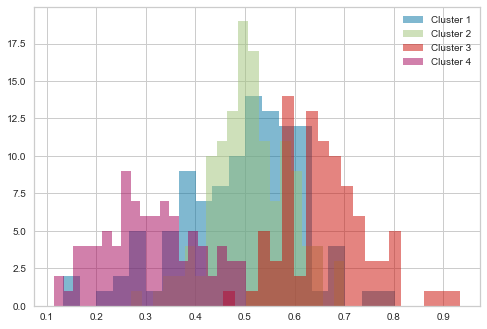

In [102]:
plt.hist(cluster_1['danceability'] , bins=20, alpha=0.5, label='Cluster 1')
plt.hist(cluster_2['danceability'] , bins=20, alpha=0.5, label='Cluster 2')
plt.hist(cluster_3['danceability'] , bins=20, alpha=0.5, label='Cluster 3')
plt.hist(cluster_4['danceability'] , bins=20, alpha=0.5, label='Cluster 4')
plt.legend(loc='upper right')
plt.show()


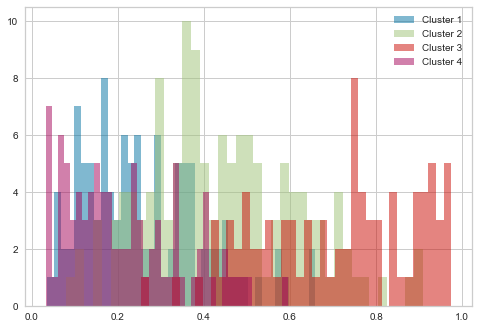

In [103]:
plt.hist(cluster_1['valence'] , bins=40, alpha=0.5, label='Cluster 1')
plt.hist(cluster_2['valence'] , bins=40, alpha=0.5, label='Cluster 2')
plt.hist(cluster_3['valence'] , bins=40, alpha=0.5, label='Cluster 3')
plt.hist(cluster_4['valence'] , bins=40, alpha=0.5, label='Cluster 4')
plt.legend(loc='upper right')
plt.show()

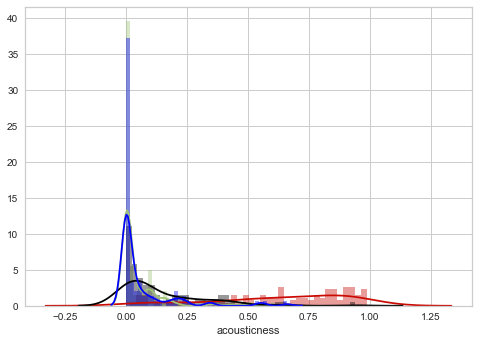

In [104]:
sns.distplot(cluster_1['acousticness'], bins=40,kde=True,color='r',norm_hist=False)
sns.distplot(cluster_2['acousticness'], bins=40,kde=True,color='g',norm_hist=False)
sns.distplot(cluster_3['acousticness'], bins=40,kde=True,color='black',norm_hist=False)
sns.distplot(cluster_4['acousticness'], bins=40,kde=True,color='blue',norm_hist=False)


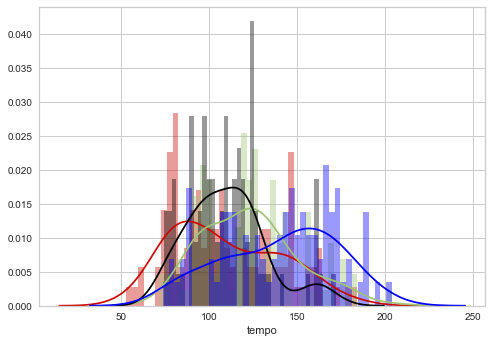

In [106]:
sns.distplot(cluster_1['tempo'], bins=40,color='r',norm_hist=False)
sns.distplot(cluster_2['tempo'], bins=40,color='g',norm_hist=False)
sns.distplot(cluster_3['tempo'], bins=40,color='black',norm_hist=False)
sns.distplot(cluster_4['tempo'], bins=40,color='blue',norm_hist=False)


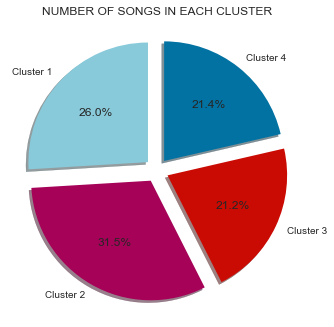

In [111]:
slices = [len(cluster_1),len(cluster_2),len(cluster_3),len(cluster_4)]
activities = ['Cluster 1','Cluster 2','Cluster 3','Cluster 4']
cols = ['c','m','r','b']
 
plt.pie(slices,
  labels=activities,   
  colors=cols,   #Specify colors for each feature
  startangle=90,  #Specify the rotation and how you want the plotting to be done 
  shadow= True,
  explode=(0.1,0.1,0.1,0.1),  #Seperation of the slices
  autopct='%1.1f%%')     #Showing the percentages of each slice 
plt.title('NUMBER OF SONGS IN EACH CLUSTER')
plt.show()